In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Generating DataFrame

In [13]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files
all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    df = pd.concat([all_months_data, current_data])
    
df.to_csv("all_data_copy.csv", index=False)
df = pd.read_csv('all_data_copy.csv')

## Generating features

In [16]:
df = df[df['Quantity Ordered'] != 'Quantity Ordered']
df.drop('Month', inplace=True, axis=1)
df['Month'] = df['Order Date'].str[0:2].astype(int)
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')
df['Price Each'] = df['Price Each'].astype('float')
df['Total Sale'] = df['Quantity Ordered'] * df['Price Each']

# What was the best month for sales? How much was earned that month?

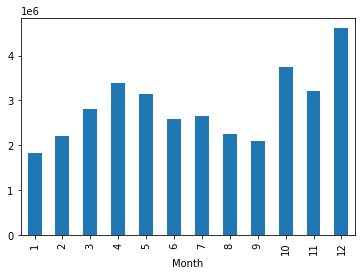

In [22]:
sales_month = df.groupby('Month').agg({'Order ID': 'count',
                                       'Total Sale': 'sum'})
sales_month
sales_month['Total Sale'].plot(kind='bar')
plt.show()